#### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data

df = pd.read_csv('./Loan_Modelling.csv')

In [3]:
# See few lines of the data

df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
# Check sample data 

df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
610,611,52,28,81,94132,3,1.8,2,275,0,0,0,0,0
1525,1526,43,18,58,95747,1,2.4,1,0,0,0,0,0,0
463,464,48,22,149,94928,2,5.5,2,0,1,1,1,1,0
282,283,34,9,71,91711,4,0.7,3,0,0,0,0,1,0
2623,2624,42,17,111,94304,3,3.0,1,0,1,1,1,0,1
2571,2572,34,8,40,91768,2,2.0,3,89,0,0,0,0,0
2960,2961,55,29,38,90035,4,1.5,3,0,0,0,0,0,1
516,517,53,27,81,90009,3,1.7,2,0,0,0,0,0,0
4418,4419,59,34,145,95125,4,1.8,1,198,1,0,0,1,0
1463,1464,35,10,94,91343,1,0.0,1,174,0,0,0,1,0


In [4]:
# Lets see the shape

df.shape

(5000, 14)

In [5]:
# Lets see if there are missing values

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# Check for duplicates

df.duplicated().sum()

0

In [7]:
# Check for the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- All the columns are numeric with integer and float datatypes
- No missing values

In [13]:
# Lets describe the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Minimum age is 23, Maximum age is 67 and Average age is 45.
- Minimum Experience shouldn't be negative, it can be zero. Maximum Experience is 43.

- Minimum Income is $8k, maximum  is  $224k, Average Income is $73.7k

- Minimum number of family member is 1, maximum is 4.
- Minimum spending on Credit Card in a month is 0 while maximum is $10k.

- Minimum Education level is 1 while maximum is 3.
- Minimum value of Mortgage is 0 while the maximum is $635k.

In [16]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

#### Visualize Data

##### Age

In [17]:
from functions import labeled_barplot


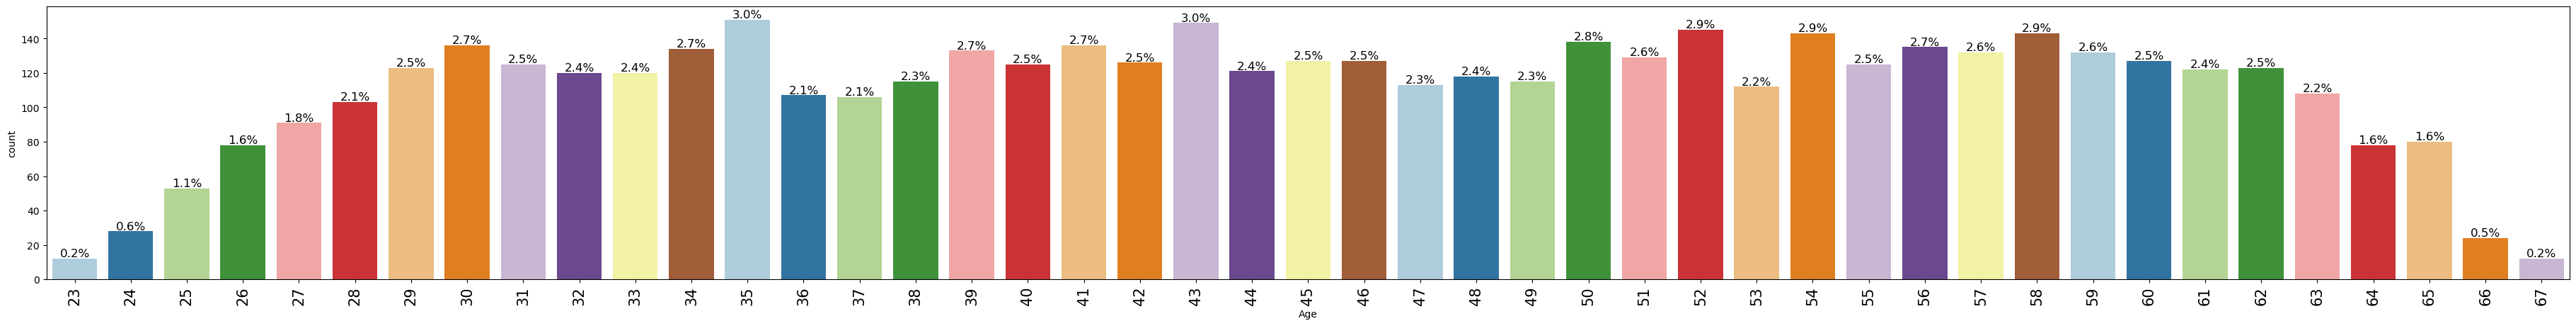

In [19]:
# Plot of Age
labeled_barplot(data=df, feature='Age', perc=True)

- The age was a lot constant from 29 to 63

##### Experience

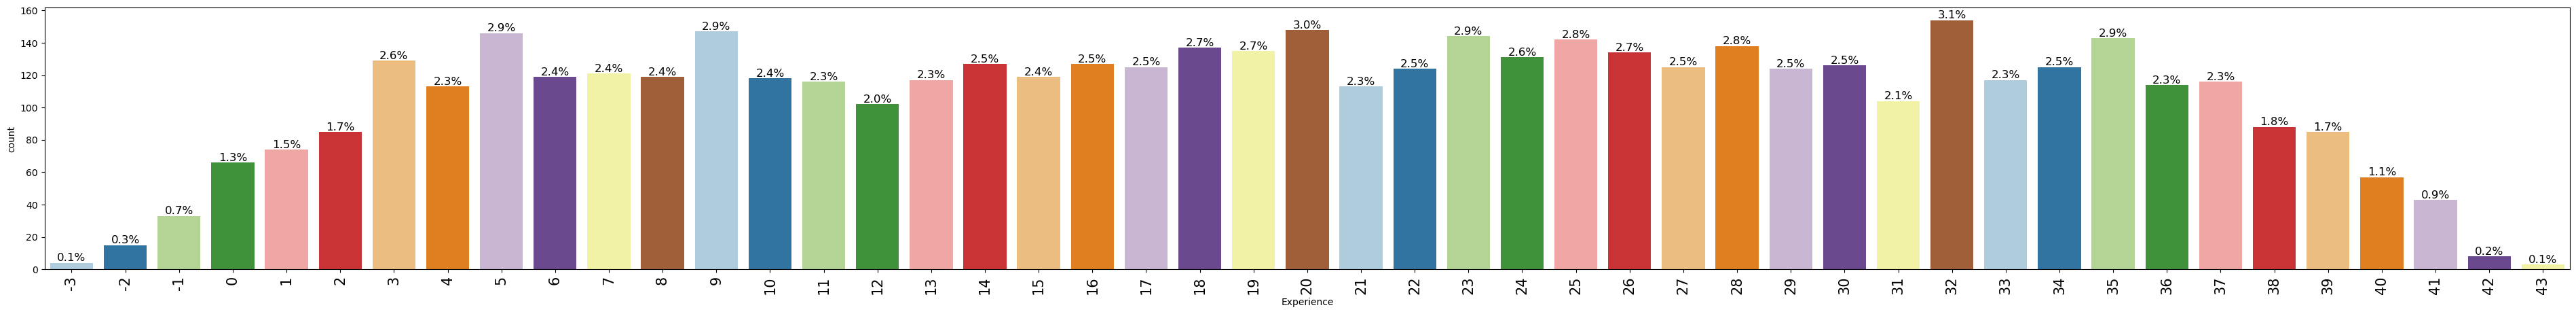

In [20]:
# Plot of Experience
labeled_barplot(data=df, feature='Experience', perc=True)

In [22]:
# Checking the negative value of 3
df[df['Experience'] == -3]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


##### Income

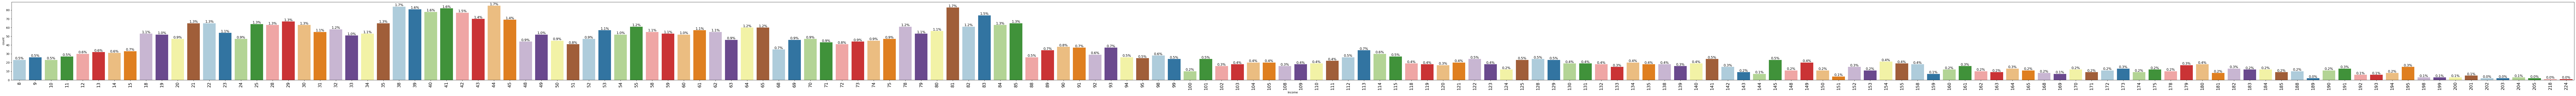

In [24]:
labeled_barplot(data=df, feature='Income', perc=True)

##### Family

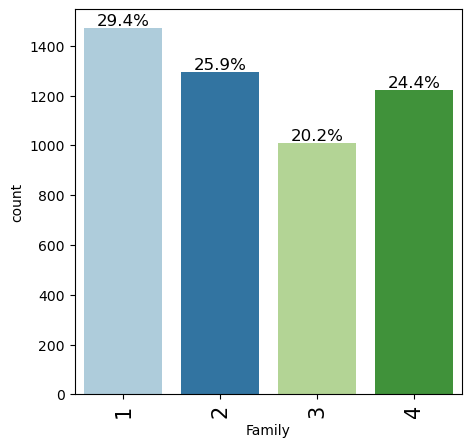

In [26]:
labeled_barplot(data=df, feature='Family', perc=True)

- 29.4% of the customers have 1 family member, 25.9% have 2 family members, 20.2% have 3 family members while 24.4% have 4 family members.

##### Average Spending on Credit Card

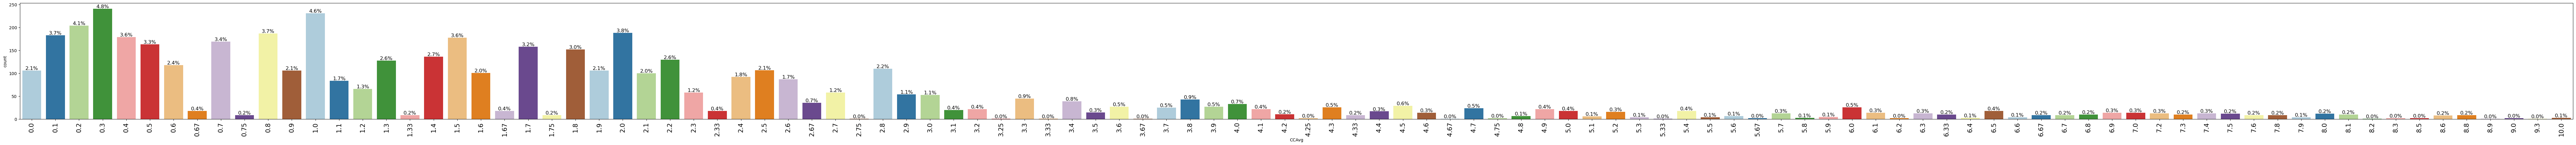

In [27]:
labeled_barplot(data=df, feature='CCAvg', perc=True)

##### Education

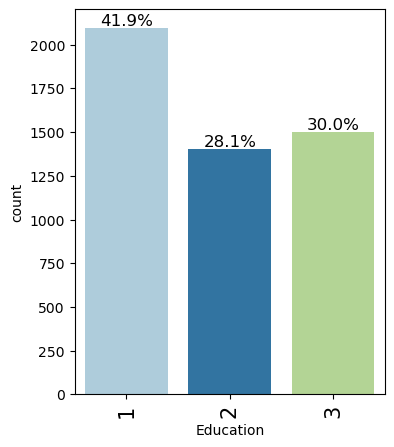

In [28]:
labeled_barplot(data=df, feature='Education', perc=True)

- 41.9% of the customers have Level 1 Education, 28.1% have Level 2 while 30% have Level 3

##### Personal Loan

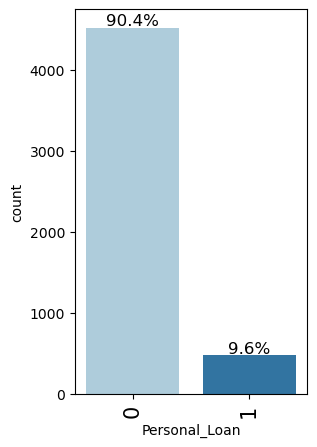

In [30]:
labeled_barplot(data=df, feature='Personal_Loan', perc=True)

- 90.4% did not accept the Personal loan while 9/6% accepted the Personal Loan.

In [48]:
df['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

##### Securities Account

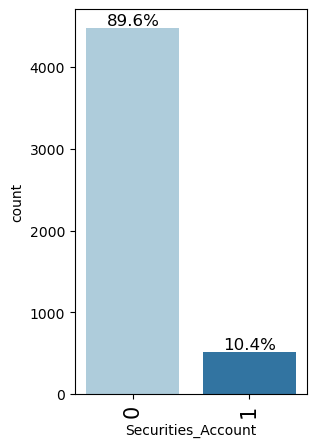

In [31]:
labeled_barplot(data=df, feature='Securities_Account', perc=True)

- 89.6% have no Security account with the bank while 10.4% have


##### Certificate of Deposit

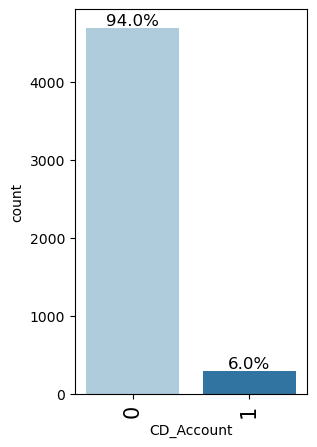

In [32]:
labeled_barplot(data=df, feature='CD_Account', perc=True)

##### Online Banking Facilities

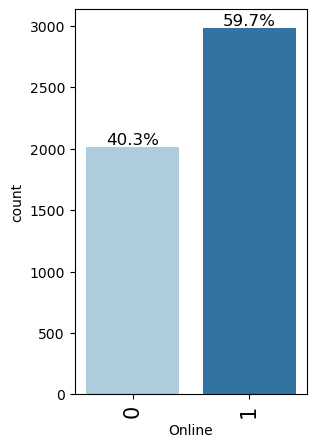

In [33]:
labeled_barplot(data=df, feature='Online', perc=True)

##### Credit Card Issued by other Bank

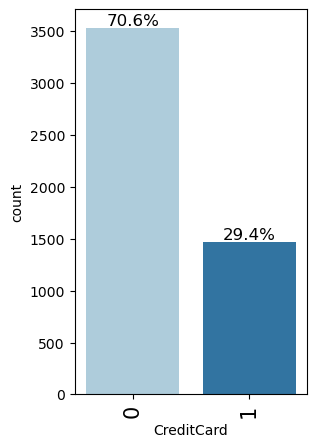

In [34]:
labeled_barplot(data=df, feature='CreditCard', perc=True)

#### Bivariate Analysis

In [39]:
# Function to create scatter plot

def custom_scatterplot(x, y, title, data):
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.show()

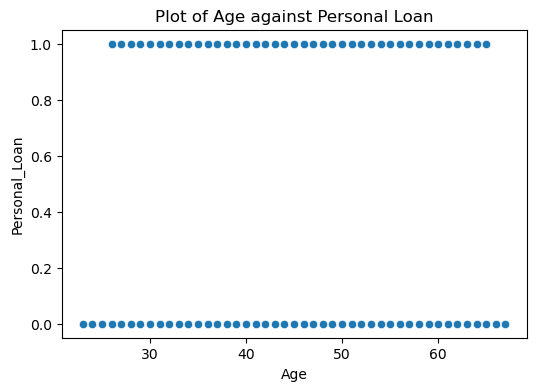

In [41]:
custom_scatterplot(x='Age', y='Personal_Loan', title='Plot of Age against Personal Loan', data=df)

- Age does not show any relationship with having a personal loan or not

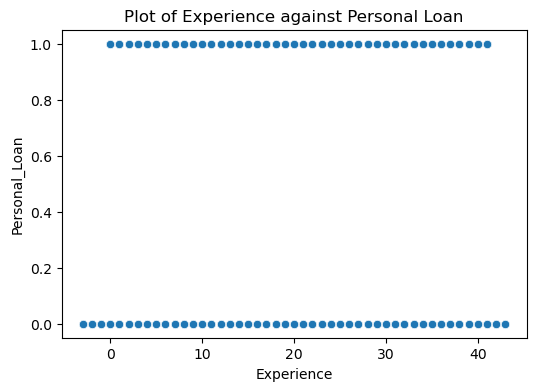

In [42]:
custom_scatterplot(x='Experience', y='Personal_Loan', title='Plot of Experience against Personal Loan', data=df)

- Experience does not show any relationship with the Personal Loan

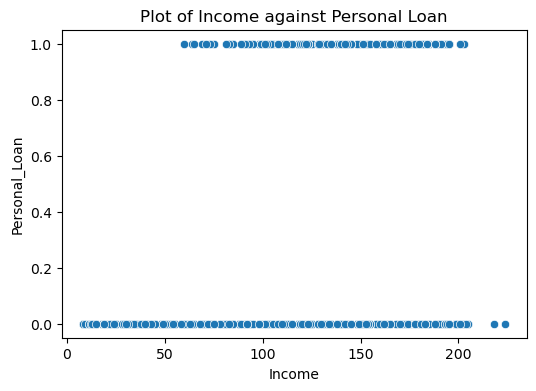

In [43]:
custom_scatterplot(x='Income', y='Personal_Loan', title='Plot of Income against Personal Loan', data=df)

- Income doesnt show any relationship with accepting Personal Loan

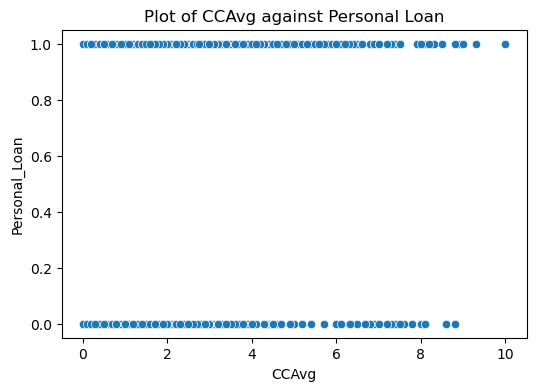

In [44]:
custom_scatterplot(x='CCAvg', y='Personal_Loan', title='Plot of CCAvg against Personal Loan', data=df)

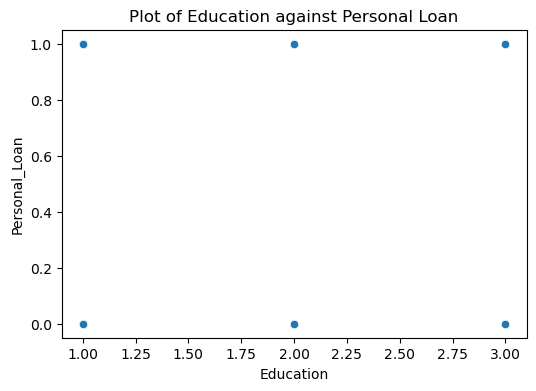

In [45]:
custom_scatterplot(x='Education', y='Personal_Loan', title='Plot of Education against Personal Loan', data=df)

#### Check Correlation

In [36]:
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


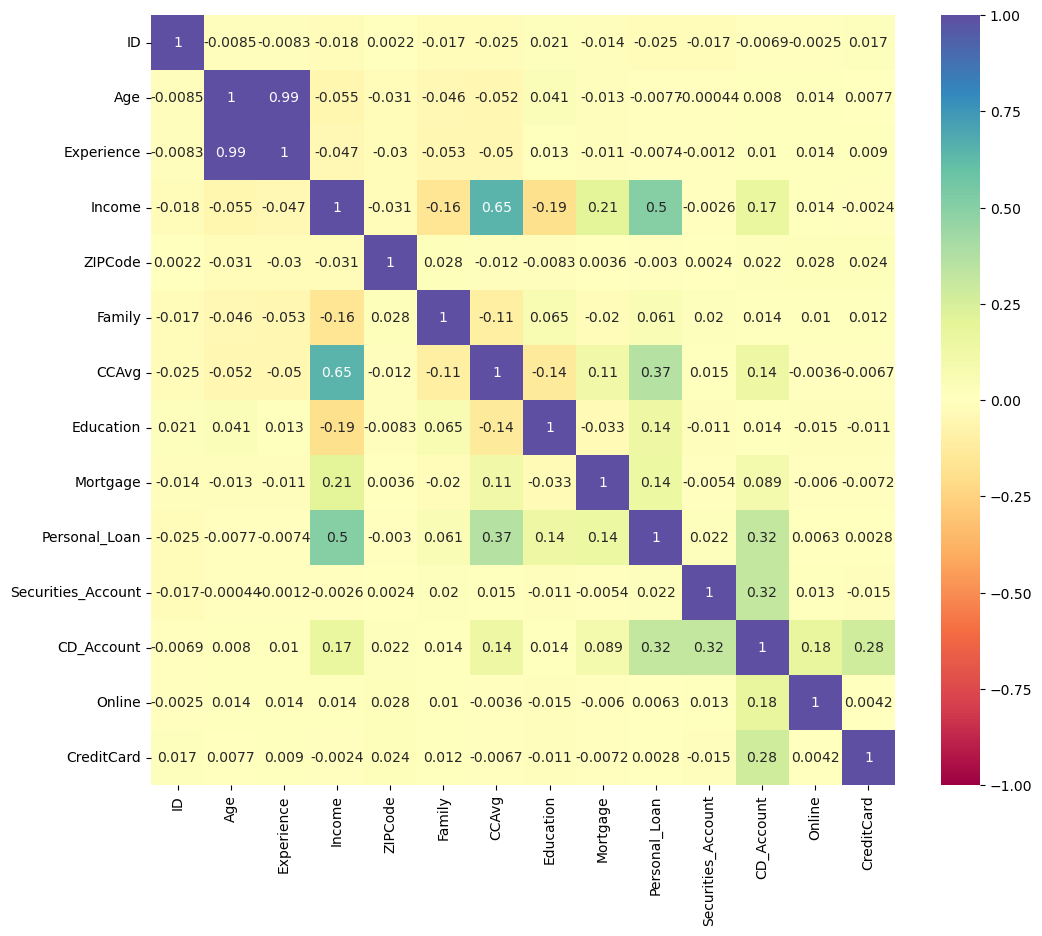

In [38]:
dat_cor = df.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(dat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

- Age and Experience do have high multicolinearity
- Income and CCAVG do have multicolinearity
- Income and Personal Loan do have correlation
- Logistic Regression will take care of the multicolinearity

#### Split the data

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop("Personal_Loan", axis = 1)
y = df["Personal_Loan"]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

##### Check the split data

In [50]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [52]:
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

#### Logistic Regression

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [60]:
# Build the Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, class_weight={1:0.9, 0:0.1})

log_reg.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [62]:
log_reg.score(x_train_sd, y_train)

0.89725

In [63]:
log_reg.predict_proba(x_test_sd)

array([[0.42111291, 0.57888709],
       [0.55983542, 0.44016458],
       [0.53631879, 0.46368121],
       ...,
       [0.91297717, 0.08702283],
       [0.87895591, 0.12104409],
       [0.9011199 , 0.0988801 ]])

- The above shows the probability of the number of customers who will accept the Personal Loan 
- Those who will not accept being very high

#### Model Performance Check